In [1]:
import pandas as pd
import numpy as np
from plotutils import *
np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# logit

In [2]:
logdir='../IPG/test/log'; date='06_20_2021'
subsolver='projectedGD'; warm_start=True
loss='logit'; lam_shrink=[0.1, 0.05]; group_size=[10, 100]; overlap_ratio=[0.1, 0.3, 0.5]; excludes= ['australian']

In [3]:
inexact_type=1; param1_lst = [1e-12]; param2_lst = ['empty']
algo_df_dict_inexact_type1 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
ppf = PerformanceProfile(algo_df_dict_inexact_type1)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
inexact_type1_best = '1-projectedGD-True-1e-12-empty'
print('Best params:', inexact_type1_best)

1-projectedGD-True-1e-12-empty
 95/96 instances terminate with status:  0
  1/96 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
Best params: 1-projectedGD-True-1e-12-empty


In [4]:
# algo_df_dict_inexact_type1['1-projectedGD-True-1e-12-empty'][algo_df_dict_inexact_type1['1-projectedGD-True-1e-12-empty']['status'] != 0]
# algo_df_dict_inexact_type1['1-projectedGD-True-1e-12-empty']

In [4]:
inexact_type=2; param1_lst = [1e-12]; param2_lst = [0.1, 0.5, 0.9]
algo_df_dict_inexact_type2 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
ppf = PerformanceProfile(algo_df_dict_inexact_type2)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
inexact_type2_best = get_best(pools)
# inexact_type2_best = '2-projectedGD-True-1e-12-0.5'
print('Best params:', inexact_type2_best)

2-projectedGD-True-1e-12-0.1
 94/96 instances terminate with status:  0
  2/96 instances terminate with status:  2
2-projectedGD-True-1e-12-0.5
 94/96 instances terminate with status:  0
  2/96 instances terminate with status:  2
2-projectedGD-True-1e-12-0.9
 96/96 instances terminate with status:  0
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
Best params: 2-projectedGD-True-1e-12-0.1


In [5]:
inexact_type=3; param1_lst = [3.0]; param2_lst = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
algo_df_dict_inexact_type3 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
ppf = PerformanceProfile(algo_df_dict_inexact_type3)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
# print("=================")
inexact_type3_best = get_best(pools)
# inexact_type3_best = '3-projectedGD-True-3.0-1.0'
print('Best params:', inexact_type3_best)

3-projectedGD-True-3.0-1.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-10.0
 95/96 instances terminate with status:  0
  1/96 instances terminate with status:  2
3-projectedGD-True-3.0-100.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-1000.0
 94/96 instances terminate with status:  0
  2/96 instances terminate with status:  2
3-projectedGD-True-3.0-10000.0
 94/96 instances terminate with status:  0
  2/96 instances terminate with status:  2
3-projectedGD-True-3.0-100000.0
 93/96 instances terminate with status:  0
  3/96 instances terminate with status:  2
3-projectedGD-True-3.0-1000000.0
 93/96 instances terminate with status:  0
  3/96 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
Best params: 3-projectedGD-True-3.0-100.0


All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
1-projectedGD-True-1e-12-empty Win:13 | Lose:83
1-projectedGD-True-1e-12-empty Win:37 | Lose:59
2-projectedGD-True-1e-12-0.1 Win:72 | Lose:24


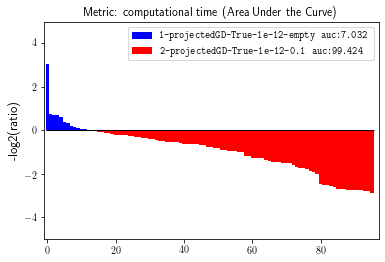

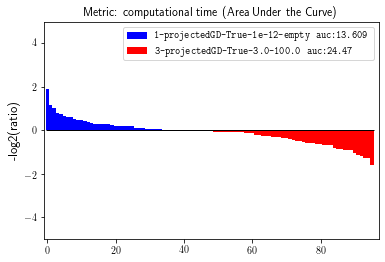

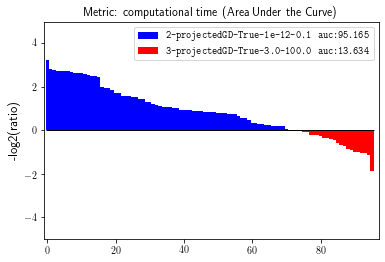

In [10]:
final = {}
final[inexact_type1_best] = algo_df_dict_inexact_type1[inexact_type1_best]
final[inexact_type2_best] = algo_df_dict_inexact_type2[inexact_type2_best]
final[inexact_type3_best] = algo_df_dict_inexact_type3[inexact_type3_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
# _ = ppf.plot(column='subits',show_num=True, options={'ratio_max':5})
_ = ppf.plot(column='time',show_num=False, options={'ratio_max':5}, save=True, saveDir='./natOG/')

In [7]:
cols = ['datasetid', 'F', 'time', 'nz']
df1 = algo_df_dict_inexact_type1[inexact_type1_best][cols].copy()
df2 = algo_df_dict_inexact_type2[inexact_type2_best][cols].copy()
df3 = algo_df_dict_inexact_type3[inexact_type3_best][cols].copy()
df13_merged = pd.merge(df1, df3, on='datasetid', suffixes=("_type1", "_type3"), how='left')

better13_z = np.sum((df13_merged['nz_type1'] - df13_merged['nz_type3']) > 0 ) 
same13_z = np.sum((df13_merged['nz_type1'] - df13_merged['nz_type3']) == 0 ) 
worse13_z = np.sum((df13_merged['nz_type1'] - df13_merged['nz_type3']) <0 ) 

better13_F = np.sum((df13_merged['F_type1'] - df13_merged['F_type3']) < -1e-8 ) 
same13_F = np.sum(np.abs(df13_merged['F_type1'] - df13_merged['F_type3']) <= 1e-8 ) 
worse13_F = np.sum((df13_merged['F_type1'] - df13_merged['F_type3']) > 1e-8 ) 

df23_merged = pd.merge(df2, df3, on='datasetid', suffixes=("_type2", "_type3"), how='left')
better23_z = np.sum((df23_merged['nz_type2'] - df23_merged['nz_type3']) > 0 ) 
same23_z = np.sum((df23_merged['nz_type2'] - df23_merged['nz_type3']) == 0 ) 
worse23_z = np.sum((df23_merged['nz_type2'] - df23_merged['nz_type3']) <0 ) 

better23_F = np.sum((df23_merged['F_type2'] - df23_merged['F_type3']) < -1e-8 ) 
same23_F = np.sum(np.abs(df23_merged['F_type2'] - df23_merged['F_type3']) <=1e-8 ) 
worse23_F = np.sum((df23_merged['F_type2'] - df23_merged['F_type3']) > 1e-8 ) 

print("For 1-3 comparsion:\n==========================")
print(" In terms final F:")
print(f"  better:{better13_F} | same:{same13_F} | worse: {worse13_F}")
print(" In terms #z:")
print(f"  better:{better13_z} | same:{same13_z} | worse: {worse13_z}")
print("For 2-3 comparsion:\n==========================")
print(" In terms final F:")
print(f"  better:{better23_F} | same:{same23_F} | worse: {worse23_F}")
print(" In terms #z:")
print(f"  better:{better23_z} | same:{same23_z} | worse: {worse23_z}")

For 1-3 comparsion:
 In terms final F:
  better:41 | same:31 | worse: 24
 In terms #z:
  better:23 | same:50 | worse: 23
For 2-3 comparsion:
 In terms final F:
  better:75 | same:7 | worse: 14
 In terms #z:
  better:26 | same:50 | worse: 20


All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
1-projectedGD-True-1e-12-empty Win:42 | Lose:54
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
1-projectedGD-True-1e-12-empty Win:43 | Lose:53
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
1-projectedGD-True-1e-12-empty Win:37 | Lose:59
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
1-projectedGD-True-1e-12-empty Win:47 | Lose:49
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
1-projectedGD-True-1e-12-empty Win:48 | Lose:48
All algorithms failed in 0 instances
Metrics for failed instances are overwritten wit

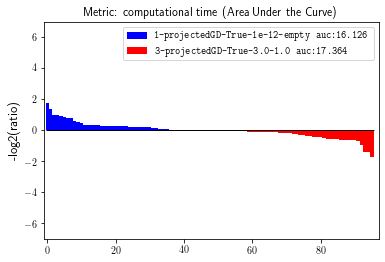

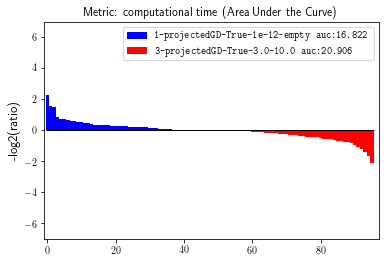

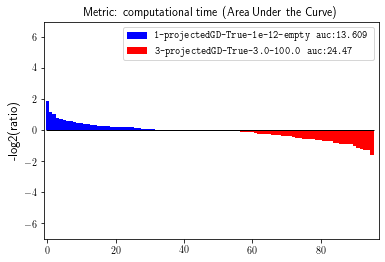

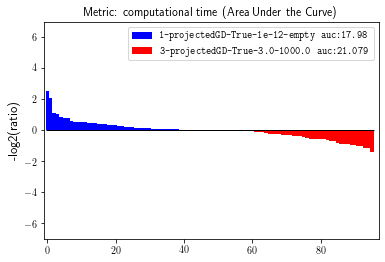

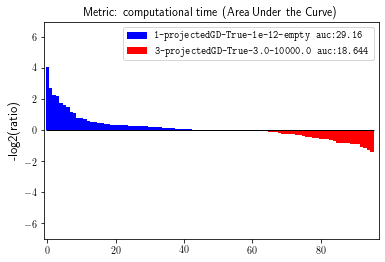

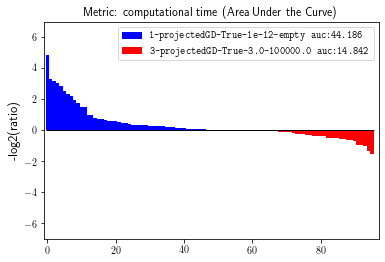

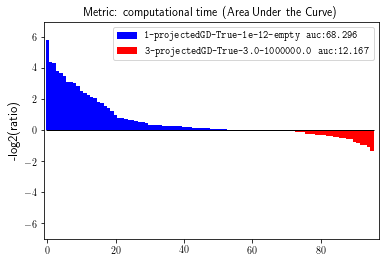

In [8]:
for c in [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]:
    final = {}
    final[inexact_type1_best] = algo_df_dict_inexact_type1[inexact_type1_best]
    type3_sensitivity = f'3-projectedGD-True-3.0-{c}'
    final[type3_sensitivity] = algo_df_dict_inexact_type3[type3_sensitivity]
    ppf = PerformanceProfile(final)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='time',show_num=False, options={'ratio_max':7}, save=True, saveDir='./natOG/sensitivity')

In [8]:
for c in [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]:
    final = {}
    final[inexact_type2_best] = algo_df_dict_inexact_type2[inexact_type2_best]
    type3_sensitivity = f'3-projectedGD-True-3.0-{c}'
    final[type3_sensitivity] = algo_df_dict_inexact_type3[type3_sensitivity]
    ppf = PerformanceProfile(final)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='time',show_num=False, options={'ratio_max':7}, save=True, saveDir='./natOG/sensitivity')

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "/home/yud319/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-f0ecef45870b>", line 8, in <module>
    _ = ppf.plot(column='time',show_num=True, options={'ratio_max':7}, save=True, saveDir='./natOG/sensitivity')
  File "/home/yud319/Inexa